# View image files

In [ ]:
img1 = imread("file01.jpg");
imshow(img1)

# Classify images

In [ ]:
deepnet = googlenet;
img1 = imread("file01.jpg");
imshow(img1)
pred1 = classify(deepnet,img1)
img2 = imread("file02.jpg");
imshow(img2)
img3 = imread("file03.jpg");
imshow(img3)
pred2 = classify(deepnet,img2)

pred3 = classify(deepnet,img3)


# Examine Network Layers

In [ ]:
deepnet = googlenet;
#Extract the Layers property of deepnet into a variable called ly
ly = deepnet.Layers
# Extract the first (input) layer of the network into a variable called inlayer
inlayer = ly(1)
#Extract the InputSize property of the first layer of the network (stored in the variable inlayer).
# Store the result in a variable called insz
insz = inlayer.InputSize
# Extract the last (output) layer of the network into a variable called outlayer.
outlayer = ly(end)
#Extract the Classes property of the last layer of the network (stored in the variable outlayer).
# Store the result in a variable called categorynames
categorynames = outlayer.Classes

# Investigate Predictions

In [ ]:
img = imread("file01.jpg");
imshow(img)
net = googlenet;
categorynames = net.Layers(end).ClassNames;
# Use the classify function with the pretrained GoogLeNet network net
[pred,scores] = classify(net,img);
#Create a bar chart of the prediction scores.
bar(scores)
# Create a logical array highscores that has the value 1 (true) wherever scores is greater than 0.01
highscores = scores > 0.01;
#Use logical indexing and the xticklabels function to label the bar chart with the appropriate predicted class names.
# The full list of class names is stored in the variable categorynames
bar(scores(highscores))

# Data store for large datasets

In [ ]:
imds = imageDatastore("*.jpg")
#Use the Files property of the datastore imds to extract the file names of the images.
fname=imds.Files
#This imports the nth image of the datastore
img = readimage(imds,7);
#Use GoogLeNet
#Note that the classify function will be running all images through GoogLeNet
net=googlenet
preds=classify(net,imds)
# additional
[preds,scores] = classify(net,imds)
bar(max(scores,[],2))
xticklabels(preds)
xtickangle(60)
ylabel("Score of Prediction")


# Process Images for Classification


In [ ]:
#Use the size function to view the size of the image
img = imread("file01.jpg");
imshow(img)
sz=size(img)
"""
The input layer of a network specifies the image size that the network requires.
expectedSize = inputlayer.InputSize

"""
net =googlenet
ly=net.Layers
insz=ly(1).InputSize
#224 x 224 x 3

#Use the (imresize) function to resize the image stored in the variable img to be 224-by-224
img = imresize(img,[224 224]);
imshow(img)

# Resize Images in a Datastore

In [ ]:
# Create an image datastore named imds
ls *.jpg
net = googlenet
imds= imageDatastore("*.jpg")
"""" 
Create an augmented image datastore from imds that will resize the images to 224-by-224.
"""
auds = augmentedImageDatastore([224 224],imds)

#Classify the images in auds using the classify function using the network stored
# in the variable net. Store the predictions in a variable preds
net =googlenet
preds = classify(net,auds)


# Preprocess Color Using a Datastore

In [ ]:
ls *.jpg
net = googlenet
imds = imageDatastore("file*.jpg")
# Create an augmented image datastore from the image datastore imds. Preprocess the images to be 224-by-224-by-3
auds = augmentedImageDatastore([224 224],imds,"ColorPreprocessing","gray2rgb")

# Classify the images in auds using the classify function. GoogLeNet is stored in the variable net. Store the predictions in a variable preds
preds =classify(net,auds)


# Create a Datastore Using Subfolders

In [ ]:
#Create a datastore flwrds to all the images in the subfolders of the Flowers folder.
net = googlenet;
flwrds = imageDatastore("Flowers","IncludeSubfolders",true)

#Use GoogLeNet (loaded as the variable net) to classify the contents of all the images in the data set. Store the results in a variable called preds
preds = classify(net,flwrds)


# Label Images in a Datastore

In [ ]:
load "pathToImages"
flwrds = imageDatastore(pathToImages,"IncludeSubfolders",true);
flowernames = flwrds.Labels

#create the datastore flwrds to all the images in the subfolders of the folder path stored in the variable pathToImages
flwrds = imageDatastore(pathToImages,"IncludeSubfolders",true,"LabelSource","foldernames")
#Extract the Labels property of flwrds into a variable called flowernames
flowernames = flwrds.Labels

# Split Data for Training and Testing

In [ ]:
load pathToImages
flwrds = imageDatastore(pathToImages,"IncludeSubfolders",true,"LabelSource","foldernames")
# Split the datastore flwrds into two datastores flwrTrain and flwrTest, such that 60% of the files in each category are in flwrTrain
[flwrTrain,flwrTest] = splitEachLabel(flwrds,0.6)
#Split the datastore flwrds into two datastores flwrTrain and flwrTest, such that a random selection of 80% of the files in each category are in flwrTrain
[flwrTrain,flwrTest] = splitEachLabel(flwrds,0.8,"randomized")
#Split the datastore flwrds into two datastores flwrTrain and flwrTest, such that 50 files in each category are in flwrTrain
[flwrTrain,flwrTest] = splitEachLabel(flwrds,50)

# Train data
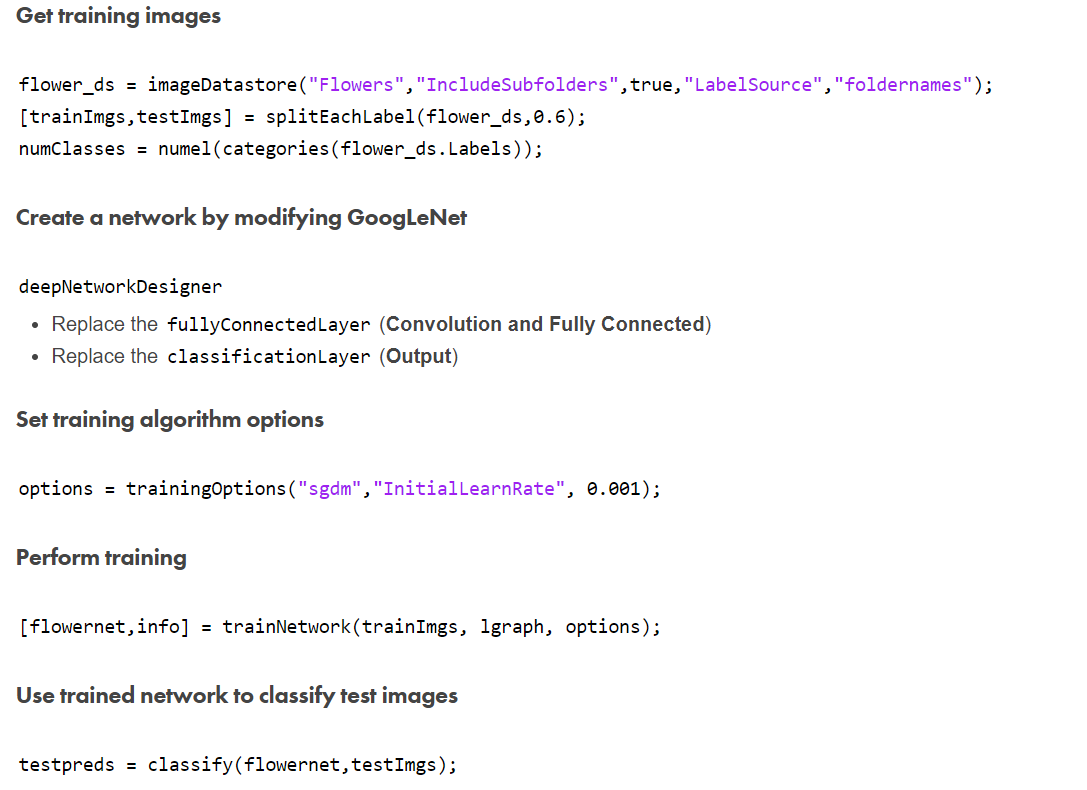

# Evaluate Performance

In [ ]:
load pathToImages
load trainedFlowerNetwork flowernet info
# Plot the training loss, stored in the TrainingLoss field of info.
plot(info.TrainingLoss)
# This code creates a datastore of the flower images.
dsflowers = imageDatastore(pathToImages,"IncludeSubfolders",true,"LabelSource","foldernames");
[trainImgs,testImgs] = splitEachLabel(dsflowers,0.98);

#Use the classify function to obtain the classifications flowernet predicts for the images in the datastore testImgs.
# Store the result in a variable called flwrPreds.
flwrPreds = classify(flowernet,testImgs)

# Investigate Test Performance

In [ ]:
load pathToImages.mat
pathToImages
flwrds = imageDatastore(pathToImages,"IncludeSubfolders",true,"LabelSource","foldernames");
[trainImgs,testImgs] = splitEachLabel(flwrds,0.98);
load trainedFlowerNetwork flwrPreds

# Store the known classifications of the test images in a variable called flwrActual by extracting the Labels property of the testImgs datastore
flwrActual = testImgs.Labels;
# Use the nnz function and the equality operator (==) to count how many of the predicted classifications (flwrPreds) match the correct classification (flwrActual).
# Store the result in a variable called numCorrect
numCorrect = nnz(flwrPreds == flwrActual)
# Calculate the fraction of test images correctly classified by dividing numCorrect by the number of test images. Store the result in a variable called fracCorrect.
fracCorrect = numCorrect/numel(flwrPreds)

# Display the confusion matrix for the flower test data. The predicted classifications are stored in the categorical array flwrPreds. 
#The known classifications are stored in the Labels property of the datastore testImgs

confusionchart(testImgs.Labels,flwrPreds)